### Zomato_Resturant_Analysis

###  Project Introduction

In this project, we perform analysis on the Zomato restaurant dataset.
We clean and merge the data, explore trends like top countries and cuisines, and build a machine learning model to predict the average cost for two people.
This project combines data analysis, visualization, and predictive modeling, and prepares the final dataset for Power BI dashboard creation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

zomato = pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\zomato.csv", encoding='latin-1')
country = pd.read_excel(r"C:\Users\subha\OneDrive\Desktop\Country-Code.xlsx")

print(zomato.head())
print(country.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Data Cleaning

Merging two datasets: Zomato and Country Code.

Handling missing values and duplicates.

Converting all restaurant costs to INR for uniformity.

In [3]:
# Merge zomato and country data on 'Country Code'
df = pd.merge(zomato, country, on='Country Code', how='left')

# View merged data
df.head()



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing 'Cuisines' or 'Average Cost for two'
df.dropna(subset=['Cuisines', 'Average Cost for two'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check missing values
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [5]:
# Check unique values in Currency column
print(df['Currency'].unique())


['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(\x8c£)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']


In [6]:
# Currency conversion rates to INR (example rates)
currency_rates = {
    'Botswana Pula(P)': 6.3,
    'Brazilian Real(R$)': 17.0,
    'Dollar($)': 83.0,
    'Emirati Diram(AED)': 22.6,
    'Indian Rupees(Rs.)': 1,
    'Indonesian Rupiah(IDR)': 0.0052,
    'NewZealand($)': 51.0,
    'Pounds(£)': 104.0,
    'Qatari Rial(QR)': 22.8,
    'Rand(R)': 4.4,
    'Sri Lankan Rupee(LKR)': 0.27,
    'Turkish Lira(TL)': 2.6
}


In [7]:
df['Cost_INR'] = df.apply(lambda row: row['Average Cost for two'] * currency_rates.get(row['Currency'], 1), axis=1)


In [8]:
df[['Average Cost for two', 'Currency', 'Cost_INR']].head()


,Average Cost for two,Currency,Cost_INR
0,1100,Botswana Pula(P),6930.0
1,1200,Botswana Pula(P),7560.0
2,4000,Botswana Pula(P),25200.0
3,1500,Botswana Pula(P),9450.0
4,1500,Botswana Pula(P),9450.0


### Basic Analysis & Visualizations
1. Top 10 Countries by Number of Restaurants

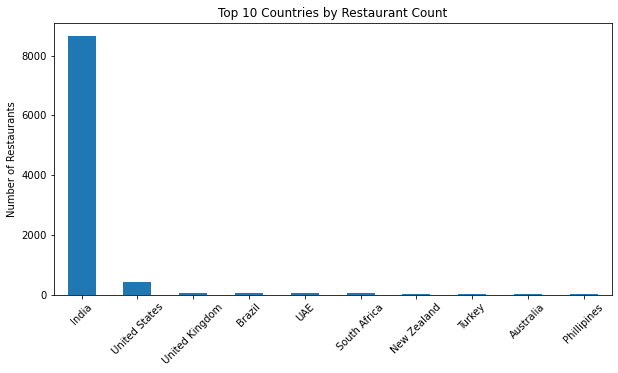

In [9]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Restaurant Count', figsize=(10,5))
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


###  2.Online Delivery Availablity

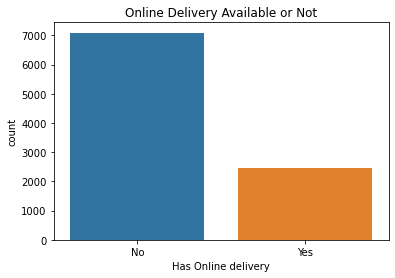

In [10]:
sns.countplot(data=df, x='Has Online delivery')
plt.title("Online Delivery Available or Not")
plt.show()


### 3. Top Cuisines

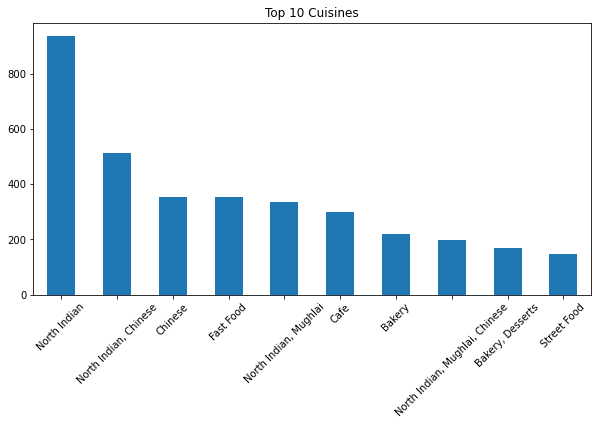

In [11]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines.plot(kind='bar', title='Top 10 Cuisines', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()


### 4.Avarage Cost Distribution

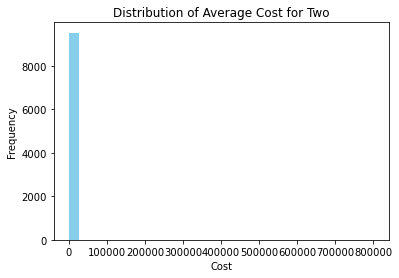

In [12]:
plt.hist(df['Average Cost for two'], bins=30, color='skyblue')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


### Prediction using Machine Learning
  
Built a Linear Regression model to predict "Average Cost for Two."

Model trained on features like Price Range, Aggregate Rating, and Votes.

Evaluated using R² Score and RMSE.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features & target
features = df[['Price range', 'Aggregate rating', 'Votes']]
target = df['Average Cost for two']

# Clean missing values
data = pd.concat([features, target], axis=1).dropna()
X = data[['Price range', 'Aggregate rating', 'Votes']]
y = data['Average Cost for two']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.011561076811805737
RMSE: 12071.350723316125


###  Key Findings

  India has the highest number of restaurants listed on Zomato.

  Online delivery is mostly available in India and UAE.

  North Indian cuisine is among the most popular.

  Strong correlation between ratings, votes, and average cost.

In [16]:
# Save the cleaned & merged dataset
df.to_csv("final_zomato_dataset.csv", index=False)
print("File saved successfully ✅")


File saved successfully ✅
